In [ ]:
# GET THE FAST_TEXT words: https://www.kaggle.com/datasets/takaishikawa/fasttext-pretrained-crawl-vector-en-bin 
# It is not small: 4G. 

In [43]:
import json
import pandas as pd
import numpy as np
import fasttext
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

print("Imports are ok")



Imports are ok


In [44]:

# Define a list of hat product descriptions
product_descriptions = ['This is a baseball cap made of cotton with an adjustable strap.',
                        'This is a fedora made of wool with a wide brim and a ribbon band.',
                        'This is a beanie made of acrylic with a pom-pom on top.',
                        'This is a cowboy hat made of leather with a curved brim and a chin strap.',
                        'This is a visor made of polyester with an elastic band.',
                        'This is a bucket hat made of denim with a flat top and a floppy brim.',
                        'This is a top hat made of silk with a tall cylindrical crown and a wide flat brim.']

# Load the FastText model (you may need to download the model first)

# fasttext.util.download_model('en', if_exists='ignore')  # English
# model = fasttext.load_model('/Users/pmontgomery/FAST_TEXT_WORDS/cc.en.300.bin')
print("Loaded the model ( Wait till this is done before the next step - might take some time )")


Loaded the model ( Wait till this is done before the next step - might take some time )


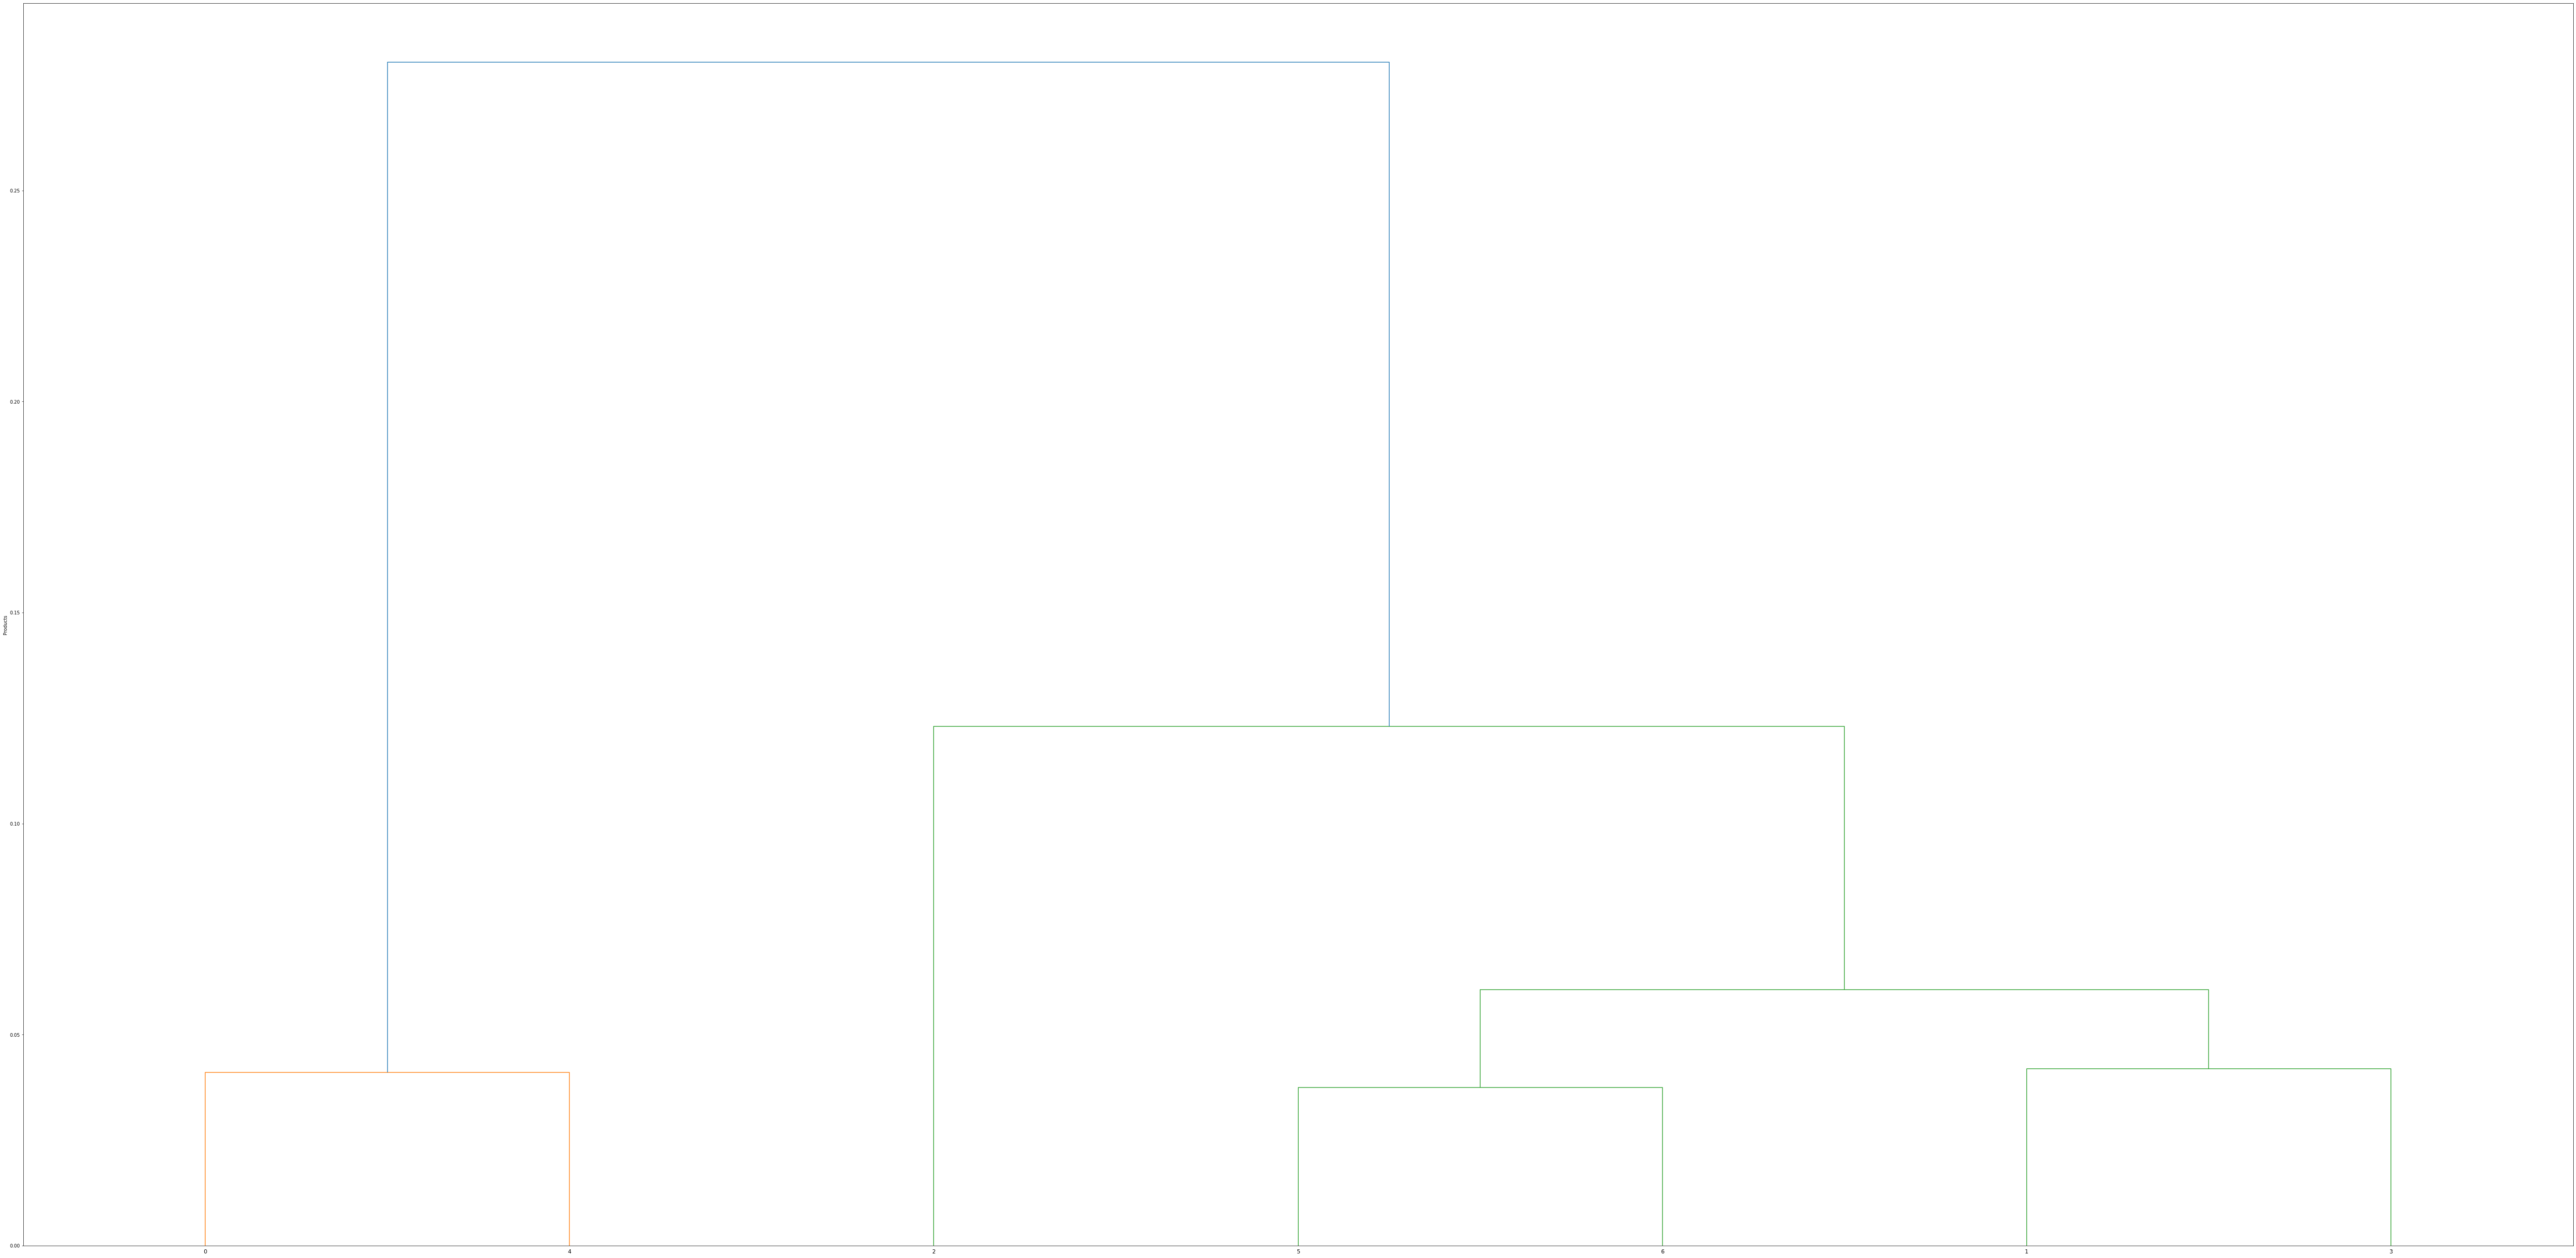

In [41]:

#model = fasttext.load_model('cc.en.300.bin')

# Embed the product descriptions as vectors
vectors = []
for text in product_descriptions:
    vector = np.mean([model.get_word_vector(word.lower()) for word in text.split()], axis=0)
    vectors.append(vector)

# Calculate cosine similarities between vectors
similarity_matrix = cosine_similarity(vectors)

# Perform hierarchical clustering
Z = linkage(similarity_matrix, method='ward')
# print(similarity_matrix)
# Plot the dendrogram
plt.figure(figsize=(100, 50))
#dendrogram(Z, labels=product_descriptions, orientation='left', leaf_font_size=8)
dendrogram(Z, orientation='top')
# dn = dendrogram(Z)
plt.ylabel('Products')
plt.show()

In [47]:
# Convert hierarchical clustering data to JSON
def create_node(index):
    if index < len(product_descriptions):
        return {'name': product_descriptions[index]}
    else:
        left = int(Z[index-len(product_descriptions), 0])
        right = int(Z[index-len(product_descriptions), 1])
        return {'children': [create_node(left), create_node(right)], 'distance': float(Z[index-len(product_descriptions), 2])}
        
root = create_node(len(product_descriptions) * 2 - 2)
output = json.dumps(root)

# Write JSON data to file
with open('hat_phylogeny.json', 'w') as f:
    f.write(output)
print(output)

{"children": [{"children": [{"name": "This is a baseball cap made of cotton with an adjustable strap."}, {"name": "This is a visor made of polyester with an elastic band."}], "distance": 0.041034402128622714}, {"children": [{"name": "This is a beanie made of acrylic with a pom-pom on top."}, {"children": [{"children": [{"name": "This is a bucket hat made of denim with a flat top and a floppy brim."}, {"name": "This is a top hat made of silk with a tall cylindrical crown and a wide flat brim."}], "distance": 0.037498940697963265}, {"children": [{"name": "This is a fedora made of wool with a wide brim and a ribbon band."}, {"name": "This is a cowboy hat made of leather with a curved brim and a chin strap."}], "distance": 0.041888820556875477}], "distance": 0.060602334807212076}], "distance": 0.12298918520008408}], "distance": 0.2803631274734905}
